In [3]:
source( "/anas/gh/splitIntoDataFrame.R" )
suppressMessages(library(bioUtilsr))
suppressMessages(library(Biostrings))


In [4]:
# Local Fucntions

# Parse the fatsa files
myfun = function(x)
{
        name=gsub("./", "", gsub(".fasta","" ,x ))
        length( readDNAStringSet(x, format="fasta"))
}

# Counts of sequences in each file
to_table =  function(f){
        tok = splitIntoDataFrame( f, header=F, sep="[._]" )
        samples = paste( tok[,1], tok[,2], sep="." )
        table( samples )
}


In [5]:
# File Paths

fp = "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1"

# Results from Chimera check with ref and denovo
ch1_c = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/chimeras.txt" )
ch1_nc = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/non_chimeras.txt" )

# Results from Chimera check with ref alone
ch2_c = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH2/chimeras.txt" )
ch2_nc = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH2/non_chimeras.txt" )

# Results from Chimera check with denovo alone
ch3_c = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH4/chimeras.txt" )
ch3_nc = readLines( "/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH4/non_chimeras.txt" )


# A quick test on the number of chimeras and non chimeras in each analysis

# roshan@r128 /anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files $ wc -l  CH{1,2,4}/chimeras.txt
#  208468 CH1/chimeras.txt
#  256366 CH2/chimeras.txt
#  187858 CH4/chimeras.txt

# roshan@r128 /anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files $ wc -l  CH{1,2,4}/non_chimeras.txt
#   952506 CH1/non_chimeras.txt
#   904608 CH2/non_chimeras.txt
#   973116 CH4/non_chimeras.txt


In [6]:
# Data
files  = file_path_list(fp, "*.[0-9].fasta")
L = sapply( files, myfun )
df = cbind(CH1ch=to_table(ch1_c), CH1nch=to_table(ch1_nc),
           CH2ch=to_table(ch2_c), CH2nch=to_table(ch2_nc), 
           CH3ch=to_table(ch3_c), CH3nch=to_table(ch3_nc))   

In [7]:
head(L)
head(df)

/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFD.1.fasta 
                                                                             36723 
/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFD.2.fasta 
                                                                             85006 
/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFD.3.fasta 
                                                                             64719 
/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFD.4.fasta 
                                                                             82869 
/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFD.5.fasta 
                                                                             76259 
/anas/roshan-current/i2mc/burcelin/frm/runs/qiime_test4/misc_files/CH1/HFS.1.fasta 
                                                                             77142

,CH1ch,CH1nch,CH2ch,CH2nch,CH3ch,CH3nch
HFD.1,11340,25383,13203,23520,10623,26100
HFD.2,13243,71763,17750,67256,12685,72321
HFD.3,5537,59182,6329,58390,5067,59652
HFD.4,13333,69536,15453,67416,11600,71269
HFD.5,9979,66280,12827,63432,8508,67751
HFS.1,8720,68422,9844,67298,6729,70413


In [8]:
names(L) =  rownames(df)
newdf = cbind(df,totalseqs= c(L))
newdf = as.data.frame(newdf)

newdf[, "CH1ch_pct"] = as.numeric(newdf[, "CH1ch"]) / as.numeric(newdf[,"totalseqs"]) *100
newdf[, "CH1nch_pct"] = as.numeric(newdf[, "CH1nch"]) / as.numeric(newdf[,"totalseqs"]) * 100

newdf[, "CH2ch_pct"] = as.numeric(newdf[, "CH2ch"]) / as.numeric(newdf[,"totalseqs"]) *100
newdf[, "CH2nch_pct"] = as.numeric(newdf[, "CH2nch"]) / as.numeric(newdf[,"totalseqs"]) * 100

newdf[, "CH3ch_pct"] = as.numeric(newdf[, "CH3ch"]) / as.numeric(newdf[,"totalseqs"]) *100
newdf[, "CH3nch_pct"] = as.numeric(newdf[, "CH3nch"]) / as.numeric(newdf[,"totalseqs"]) * 100

In [44]:
head(newdf)

,CH1ch,CH1nch,CH2ch,CH2nch,CH3ch,CH3nch,totalseqs,CH1ch_pct,CH1nch_pct,CH2ch_pct,CH2nch_pct,CH3ch_pct,CH3nch_pct
HFD.1,11340,25383,13203,23520,10623,26100,36723,30.87983,69.12017,35.95295,64.04705,28.92738,71.07262
HFD.2,13243,71763,17750,67256,12685,72321,85006,15.5789,84.4211,20.88088,79.11912,14.92248,85.07752
HFD.3,5537,59182,6329,58390,5067,59652,64719,8.555447,91.44455,9.779199,90.2208,7.829231,92.17077
HFD.4,13333,69536,15453,67416,11600,71269,82869,16.08925,83.91075,18.6475,81.3525,13.998,86.002
HFD.5,9979,66280,12827,63432,8508,67751,76259,13.08567,86.91433,16.82031,83.17969,11.15672,88.84328
HFS.1,8720,68422,9844,67298,6729,70413,77142,11.30383,88.69617,12.76088,87.23912,8.722875,91.27713


In [10]:
pal=c(rep("red", 5), rep("blue", 5) ,rep("green", 5))
names(pal) = rownames(newdf)

In [11]:
# Plot prep for Chimera

x = newdf;
xCols = colnames( x )[ grep( "[0-9]ch_pct$", colnames( x ) ) ];
N = dim(x)[1];
xpts = 1:N;
xlim=c(1,N);
ymin =min( x[, xCols] )
ymax =max( x[, xCols] )
ylim =c( ymin, ymax) ;

n.color = length( xCols );
cmap = rainbow( n.color );
names( cmap ) =  xCols;

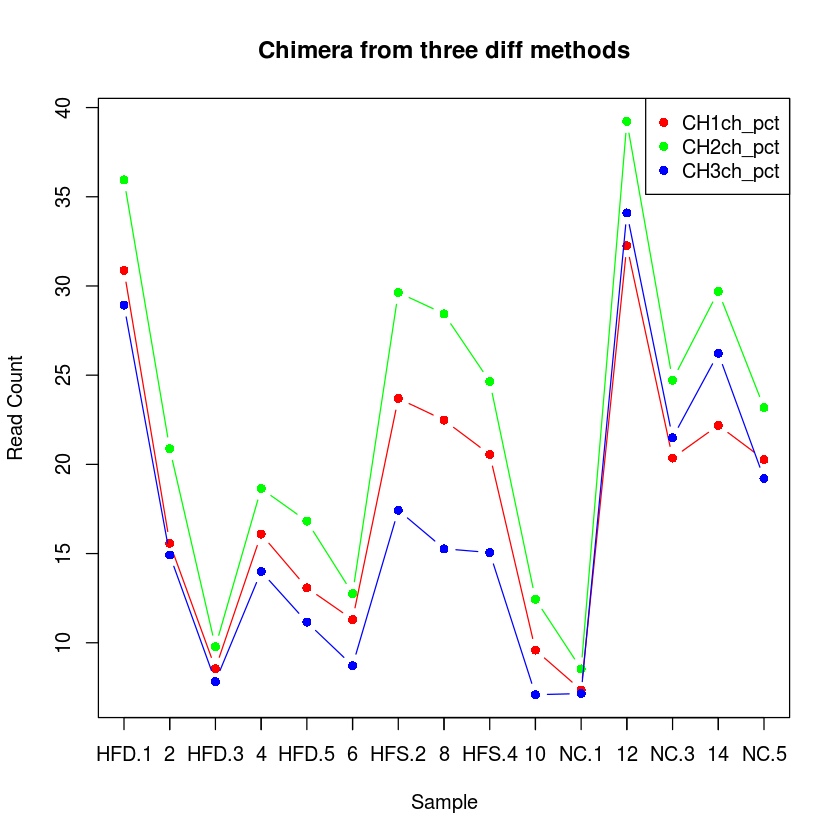

In [12]:
plot( NA, xlim=xlim, ylim=ylim, main="Chimera from three diff methods", xlab="Sample", ylab="Read Count" )
for( s in xCols ) {
    points( xpts, x[, s], col=cmap[s], type="b", pch=16 );
    
}
legend( "topright", legend=xCols, col=cmap, pch=16 );
axis(1, 1:N, rownames(x))

In [13]:
# Plot prep for non-Chimera

x = newdf;
xCols = colnames( x )[ grep( "[0-9]nch_pct$", colnames( x ) ) ];
N = dim(x)[1];
xpts = 1:N;
xlim=c(1,N);
ymin =min( x[, xCols] )
ymax =max( x[, xCols] )
ylim =c( ymin, ymax) ;

n.color = length( xCols );
cmap = rainbow( n.color );
names( cmap ) =  xCols;

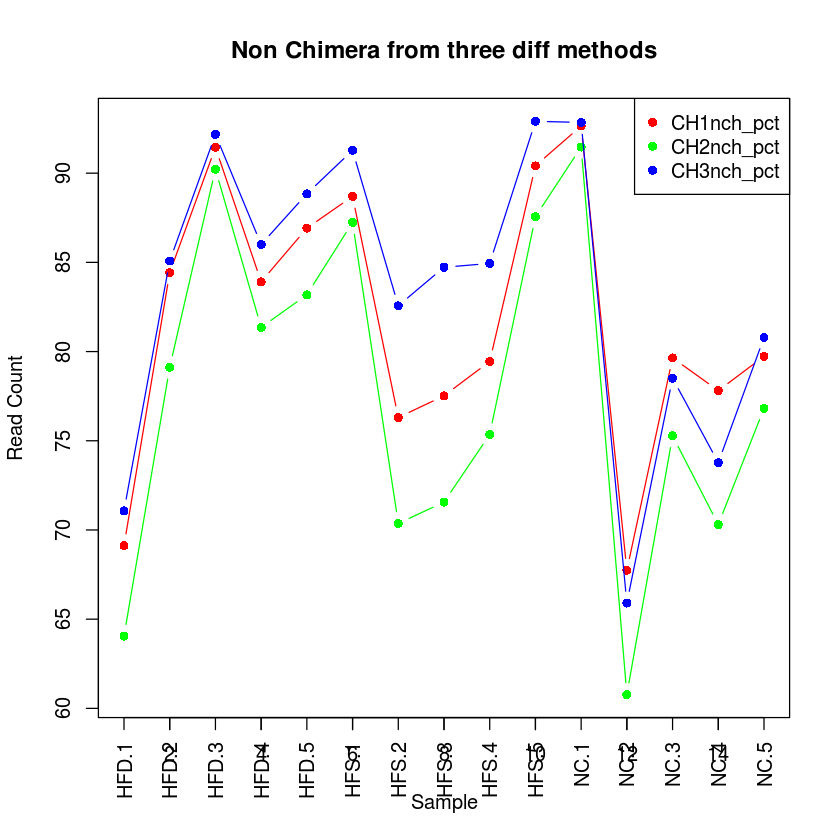

In [24]:
plot( NA, xlim=xlim, ylim=ylim, main="Non Chimera from three diff methods", xlab="Sample", ylab="Read Count" )
for( s in xCols ){
    points( xpts, x[, s], col=cmap[s], type="b", pch=16 );
}
axis(1, 1:N, rownames(x),las=3)
legend( "topright", legend=xCols, col=cmap, pch=16 );


# VennDiagram : Test 1

In [48]:
# Subset the data for vennCounts and vennDiagram
#CH1ch	CH1nch	CH2ch	CH2nch	CH3ch	CH3nch
# V = newdf[,c('CH1ch','CH2ch','CH3ch')]
# head(V)

In [49]:
#as.matrix(V/newdf$totalseqs *100)

In [50]:
# Used this piece of code to clean up the CH4 
# 
# with open("ofile.txt", "w") as od:
#      with open("chimeras.txt" ) as dat:
#          d = dat.readlines()
#          od.writelines([i[::-1].replace('.', '_', 1)[::-1] for i in d])